In [1]:
# !pip install yfinance # uncomment these to install missing packages if they are not already installed
# !pip install pandas 

import yfinance as yf
import pandas as pd

def get_price(tick,start='2022-10-01',end=None):
    return yf.Ticker(tick).history(start=start,end=end)['Close']

def get_prices(tickers,start='2022-10-01',end=None):
    df=pd.DataFrame()
    for s in tickers:
        df[s]=get_price(s,start,end)
    return df

# Prepare training and testing data sets

In [2]:
feature_stocks=['tsla','meta','goog','amzn','nflx','gbtc','gdx','intc','dal','c']
predict_stock='msft'

# training set
start_date_train='2022-10-01'
end_date_train='2022-12-31'

X_train=get_prices(feature_stocks,start=start_date_train,end=end_date_train)
y_train=get_prices([predict_stock],start=start_date_train,end=end_date_train)

# testing set
start_date_test='2023-01-01' # end date omit, default is doday
X_test=get_prices(feature_stocks,start=start_date_test)
y_test=get_prices([predict_stock],start=start_date_test)

In [3]:
X_train

,tsla,meta,goog,amzn,nflx,gbtc,gdx,intc,dal,c
Date,,,,,,,,,,
2022-10-03 00:00:00-04:00,242.399994,138.463089,99.300003,115.879997,239.039993,11.66,24.225460,25.927668,28.055294,39.835403
2022-10-04 00:00:00-04:00,249.440002,140.131317,102.410004,121.089996,240.740005,12.10,24.912365,26.629454,30.527258,41.566963
2022-10-05 00:00:00-04:00,240.809998,138.832687,102.220001,120.949997,236.729996,11.99,24.544727,26.571774,30.298923,41.033463
2022-10-06 00:00:00-04:00,238.130005,138.922607,102.239998,120.300003,240.020004,11.95,24.815619,26.129555,30.398201,40.303398
2022-10-07 00:00:00-04:00,223.070007,133.308548,99.570000,114.559998,224.750000,11.35,23.596603,24.725977,29.177109,39.489086
...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,123.150002,117.914894,89.809998,85.250000,294.959991,8.33,28.403605,25.420433,32.919800,41.905972
2022-12-27 00:00:00-05:00,109.099998,116.756119,87.930000,83.040001,284.170013,7.86,29.121811,25.274284,32.661686,42.029068
2022-12-28 00:00:00-05:00,112.709999,115.497459,86.459999,81.820000,276.880005,7.80,28.216673,24.884548,31.758274,42.246834


In [4]:
y_train

,msft
Date,
2022-10-03 00:00:00-04:00,237.514328
2022-10-04 00:00:00-04:00,245.545273
2022-10-05 00:00:00-04:00,245.860962
2022-10-06 00:00:00-04:00,243.483276
2022-10-07 00:00:00-04:00,231.101425
...,...
2022-12-23 00:00:00-05:00,236.195007
2022-12-27 00:00:00-05:00,234.443817
2022-12-28 00:00:00-05:00,232.039612


# Convert training and testing data into numpy array

In [5]:
import numpy as np

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)


# Use linear regression to predict msft stock price from the other stocks' prices 

## 1. Append a dummy feature to both X_train and X_test

In [6]:
# Append a dummy feature to both arrays
X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)

In [7]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,242.399994,138.463089,99.300003,115.879997,239.039993,11.66,24.225460,25.927668,28.055294,39.835403,1.0
1,249.440002,140.131317,102.410004,121.089996,240.740005,12.10,24.912365,26.629454,30.527258,41.566963,1.0
2,240.809998,138.832687,102.220001,120.949997,236.729996,11.99,24.544727,26.571774,30.298923,41.033463,1.0
3,238.130005,138.922607,102.239998,120.300003,240.020004,11.95,24.815619,26.129555,30.398201,40.303398,1.0
4,223.070007,133.308548,99.570000,114.559998,224.750000,11.35,23.596603,24.725977,29.177109,39.489086,1.0
...,...,...,...,...,...,...,...,...,...,...,...
58,123.150002,117.914894,89.809998,85.250000,294.959991,8.33,28.403605,25.420433,32.919800,41.905972,1.0
59,109.099998,116.756119,87.930000,83.040001,284.170013,7.86,29.121811,25.274284,32.661686,42.029068,1.0
60,112.709999,115.497459,86.459999,81.820000,276.880005,7.80,28.216673,24.884548,31.758274,42.246834,1.0
61,121.820000,120.132538,88.949997,84.180000,291.119995,7.98,28.354410,25.537352,32.492916,42.758110,1.0


In [8]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10
0,108.099998,124.607788,89.699997,85.820000,294.950012,8.200000,29.180841,26.044008,32.373787,43.345139,1.0
1,113.639999,127.235008,88.709999,85.139999,309.410004,8.380000,30.420485,26.969627,34.140888,44.462376,1.0
2,110.339996,126.805458,86.769997,83.120003,309.700012,8.450000,30.154846,26.852705,34.974808,44.263550,1.0
3,113.059998,129.882202,88.160004,86.080002,315.549988,8.650000,31.050146,27.992682,35.769009,44.793762,1.0
4,119.769997,129.332779,88.800003,87.360001,315.170013,9.650000,30.754993,28.557795,36.503651,45.011532,1.0
...,...,...,...,...,...,...,...,...,...,...,...
322,157.110001,499.760010,156.000000,183.320007,617.520020,55.880001,33.029999,36.259998,46.549999,57.020000,1.0
323,155.449997,494.170013,156.880005,181.279999,613.690002,54.310001,33.549999,35.680000,47.880001,58.169998,1.0
324,149.929993,501.799988,157.460007,179.220001,610.559998,56.580002,33.750000,35.040001,47.849998,58.320000,1.0
325,147.050003,481.070007,155.720001,174.630005,555.039978,57.310001,34.070000,34.200001,47.570000,59.139999,1.0


## 2. Find the best linear regression model based on your training data ($w=(X X')^{-1} X y$)
### Note that you may need to transpose the matrices to make things work



In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
coef = pd.DataFrame(np.transpose(model.coef_))

**Linear Regression Equation Coefficients**

In [12]:
coef

,0
0,-0.031139
1,0.226795
2,0.699477
3,0.073580
4,0.091166
5,0.161671
6,2.242816
7,1.671424
8,-0.031779
9,-0.546244


## Testing Against Test Values ##

In [13]:
y_pred_test = model.predict(X_test)

**MSFT Predicted Values Using Test Data**

In [14]:
pd.DataFrame(y_pred_test)

,0
0,242.924001
1,247.613131
2,245.441509
3,251.408841
4,251.884439
...,...
322,434.933626
323,433.106383
324,434.642345
325,422.406906


**MSFT Test Values**

In [15]:
pd.DataFrame(y_test)

,0
0,237.036026
1,226.667297
2,219.949371
3,222.541550
4,224.708298
...,...
322,414.579987
323,411.839996
324,404.269989
325,399.119995


## Testing Against Training Values ##

In [16]:
y_pred_train = model.predict(X_train)

**MSFT Predicted Values Using Training Data**

In [17]:
pd.DataFrame(y_pred_train)

,0
0,237.019374
1,241.652519
2,240.477888
3,241.105427
4,231.925696
...,...
58,238.977703
59,237.922599
60,232.960712
61,238.068302


**MSFT Training Values**

In [18]:
pd.DataFrame(y_train)

,0
0,237.514328
1,245.545273
2,245.860962
3,243.483276
4,231.101425
...,...
58,236.195007
59,234.443817
60,232.039612
61,238.450806


## 3. Report your training and testing error
### How far your prediction from the actual price. Compute the mean square error for both training and testing

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

**Mean Squared Error for Test Data**

In [21]:
msetes = mean_squared_error(y_test, y_pred_test)
r2tes = r2_score(y_test, y_pred_test)
print(f"Mean Squared Test Error: {msetes}")
print(f"R-squared: {r2tes}")

Mean Squared Test Error: 166.67726554581566
R-squared: 0.9441776388541987


**Mean Squared Error for Training Data**

In [32]:
msetra = mean_squared_error(y_train, y_pred_train)
r2tra = r2_score(y_train, y_pred_train)
print(f"Mean Squared Training Error: {msetra}")
print(f"R-squared: {r2tra}")

Mean Squared Training Error: 10.850970558475597
R-squared: 0.8790052958111659


In [27]:
import matplotlib.pyplot as plt

**Actual vs Predicted MSFT Price For Test Data**

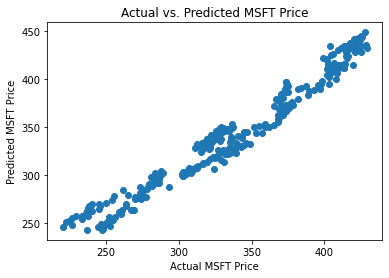

In [29]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual MSFT Price")
plt.ylabel("Predicted MSFT Price")
plt.title("Actual vs. Predicted MSFT Price")
plt.show()

**Actual vs Predicted MSFT Price For Training Data**

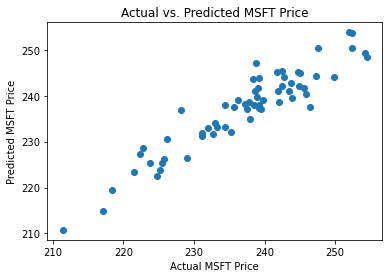

In [31]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual MSFT Price")
plt.ylabel("Predicted MSFT Price")
plt.title("Actual vs. Predicted MSFT Price")
plt.show()